<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/AprendizadoMaquina/T%C3%B3pico%2001%20-%20Introdu%C3%A7%C3%A3o/T%C3%B3pico_01_Introdu%C3%A7%C3%A3o_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn

O Scikit-Learn é uma biblioteca Python que implementa diversos algoritmos de aprendizado de máquina. Sua API é limpa e padronizada, com uma documentação online completa. A padronização permite que, uma vez aprendida a sintaxe para um modelo, mudar para outro é fácil. Este notebook apresenta o primeiro contato com Scikit-Learn, abordando a representação de dados, modelos e um exemplo prático de uso para explorar imagens de dígitos escritos à mão.

## Representação de dados no Scikit-Learn

A aprendizagem de máquina trata da criação de modelos a partir de dados: por esse motivo, começaremos discutindo como os dados podem ser representados para serem compreendidos pelo computador. A melhor maneira de pensar sobre dados no Scikit-Learn é em termos de tabelas de dados.

###Dados como tabela

Uma tabela básica é uma grade bidimensional de dados, na qual as linhas representam as amostras individuais do conjunto de dados e as colunas representam as características relacionadas a cada um dessas amostras. Por exemplo, considere o conjunto de dados Íris, referente a atributos deste gêneto de plantas, analisado por Ronald Fisher em 1936. Podemos baixar esse conjunto de dados na forma de um DataFrame do Pandas usando a biblioteca seaborn:

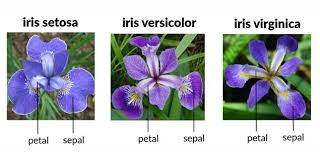

In [60]:
#biblioteca para manipulação de dados estruturados
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Remover '(cm)' dos nomes das features
df.columns = [col.replace(' (cm)', '') for col in df.columns]

# Adicionar a coluna de classes
df['species'] = data.target

class_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = df['species'].map(class_names)

df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [61]:
# mapear a coluna de classes com nomes

# Embaralhar o DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,sepal length,sepal width,petal length,petal width,species
0,6.1,2.8,4.7,1.2,versicolor
1,5.7,3.8,1.7,0.3,setosa
2,7.7,2.6,6.9,2.3,virginica
3,6.0,2.9,4.5,1.5,versicolor
4,6.8,2.8,4.8,1.4,versicolor
...,...,...,...,...,...
145,6.1,2.8,4.0,1.3,versicolor
146,4.9,2.5,4.5,1.7,virginica
147,5.8,4.0,1.2,0.2,setosa
148,5.8,2.6,4.0,1.2,versicolor


In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [63]:
df.describe()


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Aqui, cada linha dos dados se refere a uma única flor observada, e o número de linhas é o número total de flores no conjunto de dados. (n_samples)

Da mesma forma, cada coluna dos dados se refere a uma peça quantitativa específica de informação que descreve cada amostra. Em geral, nos referiremos às colunas da matriz como características e ao número de colunas como n_features.

#### Rótulo (Classe)

Por exemplo, nos dados anteriores, podemos desejar construir um modelo que possa prever a espécie da flor com base em outras medições; nesse caso, a coluna de espécies seria considerada como a classe.

Com isso em mente, podemos visualizar os dados separados por classe e características para analisar a distribuição.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x600 with 0 Axes>

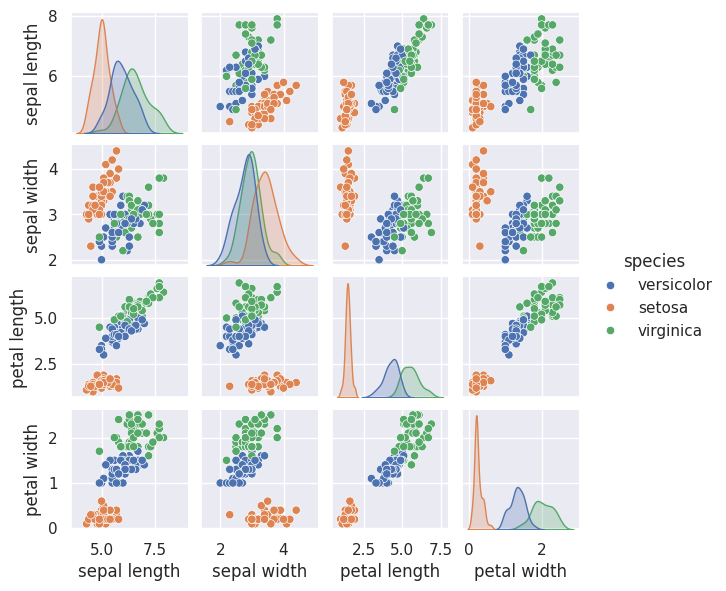

In [64]:
%matplotlib inline
import seaborn as sns; sns.set()

plt.figure(figsize=(10, 6))

sns.pairplot(df, hue='species', size=1.5);
plt.show()

Para treinarmos um modelo utilizando a matriz, necessitamos seperar o vetor de característica (x) e o seu rótulo (y)

In [77]:
X_iris = df.drop('species', axis=1)
X_iris = X_iris.to_numpy()
print(X_iris.shape)
print(X_iris[0])


(150, 4)
[6.1 2.8 4.7 1.2]


In [73]:
y_iris = df['species']
y_iris.shape
y_iris[0]

'versicolor'

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.02-samples-features.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

In [78]:
print(X_iris[0], y_iris[0])

[6.1 2.8 4.7 1.2] versicolor


#Aprendizado Supervisionado: Classificação Base Iris


#Preparação dos dados

In [83]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [84]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8947368421052632

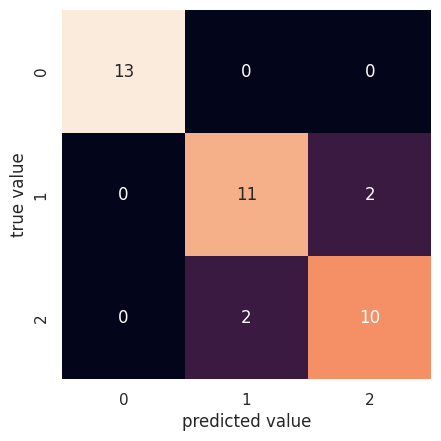

In [86]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

#0 -> Setosa, 1 -> Versicolor, 2 -> Verginica

### Digitos Manuscritos



In [87]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape



(1797, 8, 8)

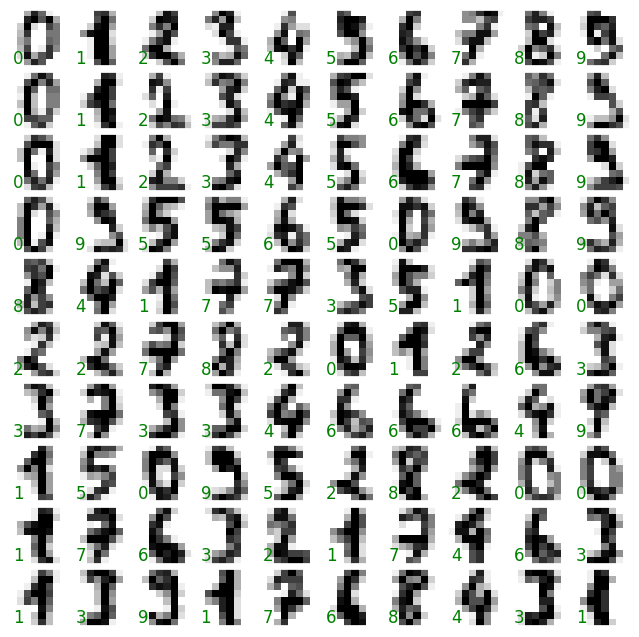

In [88]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [13]:
X = digits.data
y = digits.target
y.shape
print(X.shape, y.shape)

#Data preparation (Holdout)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

(1797, 64) (1797,)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


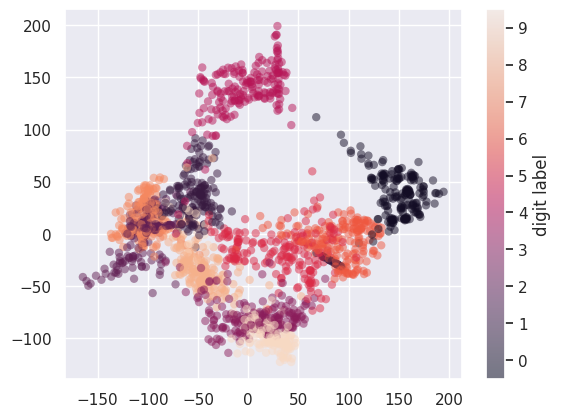

In [14]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

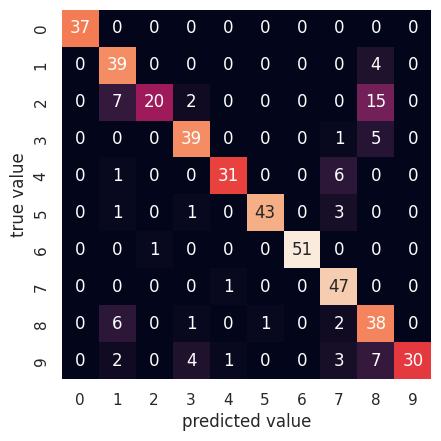

In [16]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

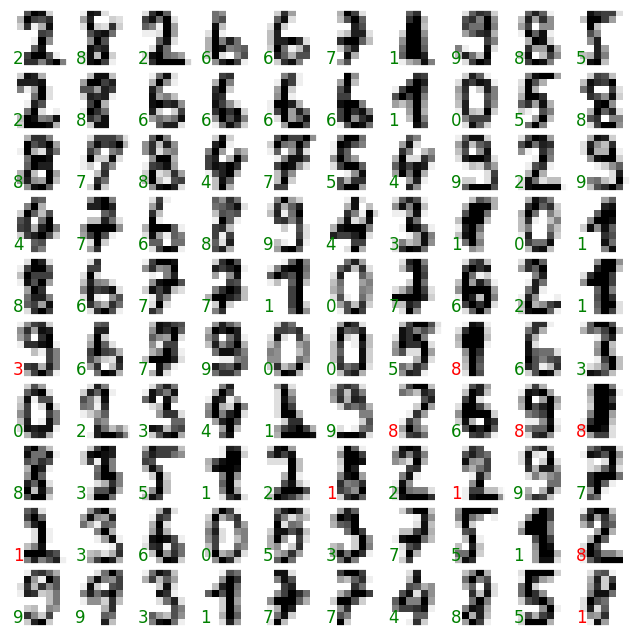

In [17]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')